# Imports

In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
sns.set_palette("flare")

# Dataset Overview

In [124]:
df_netflix = pd.read_csv('netflix_titles.csv')
(df_netflix.head(5))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [125]:
print("Columns:\n",df_netflix.columns)
print("---------------------------------------------------------------------------")
print("Shape:",df_netflix.shape)
print("---------------------------------------------------------------------------")
print("Data Types:\n",df_netflix.dtypes)
print("---------------------------------------------------------------------------")
for col in df_netflix.columns:
    print(col + ":" , round(df_netflix[col].isnull().mean()*100,2))
print("---------------------------------------------------------------------------")
df_netflix.isnull().agg('sum').sort_values(ascending=False)

Columns:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
---------------------------------------------------------------------------
Shape: (8807, 12)
---------------------------------------------------------------------------
Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
---------------------------------------------------------------------------
show_id: 0.0
type: 0.0
title: 0.0
director: 29.91
cast: 9.37
country: 9.44
date_added: 0.11
release_year: 0.0
rating: 0.05
duration: 0.03
listed_in: 0.0
description: 0.0
---------------------------------------------------------------------------


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

- The dataset contains **8,807 observations and 12 columns**, with each row representing a movie or TV show.
- Most columns are **categorical (`object` type)**, while `release_year` is the only numerical column (`int64`).
- Core identifier and descriptive columns such as `show_id`, `type`, `title`, `release_year`, `listed_in`, and `description` have **no missing values**, indicating strong data completeness in essential fields.
- Very small amounts of missing data are present in `date_added`, `rating`, and `duration` (each below **0.2%**), which are negligible at the dataset level.
- Moderate missingness is observed in `cast` and `country`, affecting roughly **9–10%** of the records.
- The `director` column has a **high proportion of missing values (~30%)**, making it the most incomplete feature in the dataset.
- Missing values are **not uniformly distributed** and are concentrated in a few descriptive metadata columns rather than key identifiers.
- Overall, the dataset is **well-structured and largely complete**, suitable for exploratory analysis with awareness of missingness in certain attributes.


Axes(0.1275,0.11;0.77x0.77)
type
Movie      5281
TV Show    2015
Name: count, dtype: int64


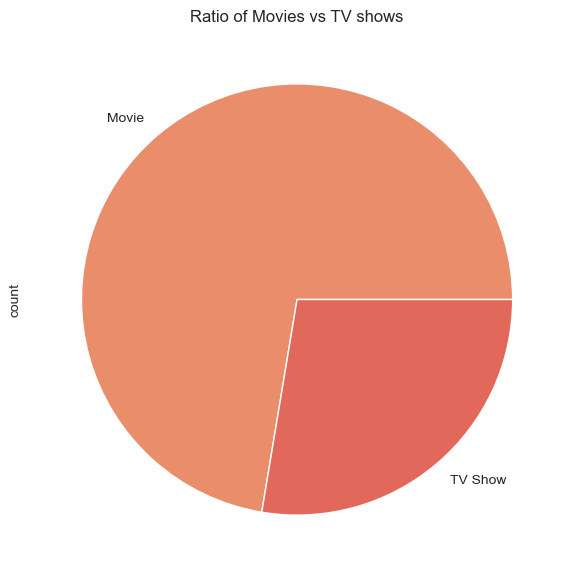

In [213]:
print(df_netflix['type'].value_counts().plot(kind ='pie',
                                             y = 'type',
                                             figsize = (7,7),
                                             title = 'Ratio of Movies vs TV shows'))
print(df_netflix['type'].value_counts())
plt.show()

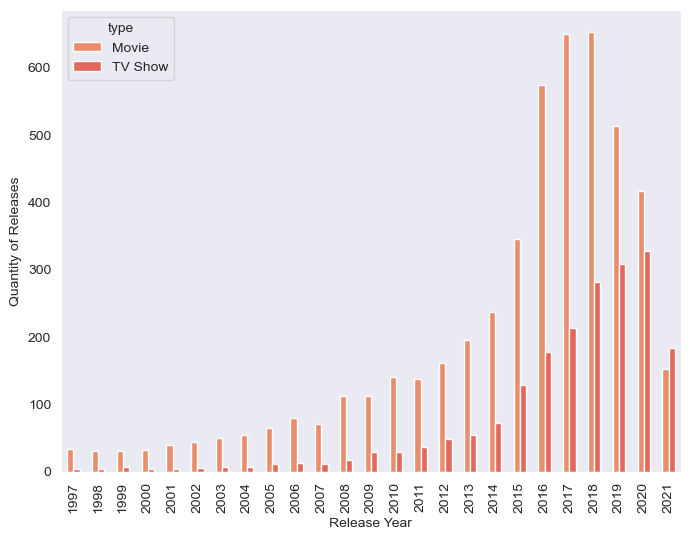

Max Number of Movies (In a Year):  653.0
Min Number of Movies (In a Year): 1.0
Max Number of TV Shows (In a Year):  327.0
Min Number of TV Shows (In a Year): 1.0
Average Number of Movies (In a Year): 73.35
Average Number of TV Shows (In a Year):  47.98


In [206]:
df_netflix_per_year = df_netflix.pivot_table(columns = 'type',
                       index ='release_year',
                       values = 'show_id',
                       aggfunc = 'count')

df_netflix_per_year.loc[1997:].plot(kind='bar',
                              figsize=(8, 6),
                             xlabel = 'Release Year',
                             ylabel = 'Quantity of Releases')
plt.show()
print("Max Number of Movies (In a Year): ",df_netflix_per_year['Movie'].max())
print("Min Number of Movies (In a Year):",df_netflix_per_year['Movie'].min())
print("Max Number of TV Shows (In a Year): ",df_netflix_per_year['TV Show'].max())
print("Min Number of TV Shows (In a Year):",df_netflix_per_year['TV Show'].min()) 
print("Average Number of Movies (In a Year):",round(df_netflix_per_year['Movie'].mean(),2))
print("Average Number of TV Shows (In a Year): ",round(df_netflix_per_year['TV Show'].mean(),2))

## Content Distribution by Type and Release Year

- The dataset contains a total of **8,807 titles**, comprising **6,131 Movies** and **2,676 TV Shows**, indicating a clear dominance of movie content on the platform.
- Movies account for **approximately 70%** of the total catalog, while TV shows make up the remaining **30%**, showing a substantially higher emphasis on movie releases.
- The maximum number of movies released in a single year is **767**, compared to a peak of **436 TV shows**, highlighting stronger year-wise scaling for movies.
- The minimum yearly release count for both movies and TV shows is **1**, reflecting sparse content additions in earlier years.
- On average, around **84 movies** and **58 TV shows** are released per year, suggesting consistently higher production and acquisition of movies across the platform’s timeline.
- Overall, both aggregate counts and year-wise statistics reinforce that **movies form the majority of the catalog**, while TV shows, though fewer in number, show significant annual growth in later years.



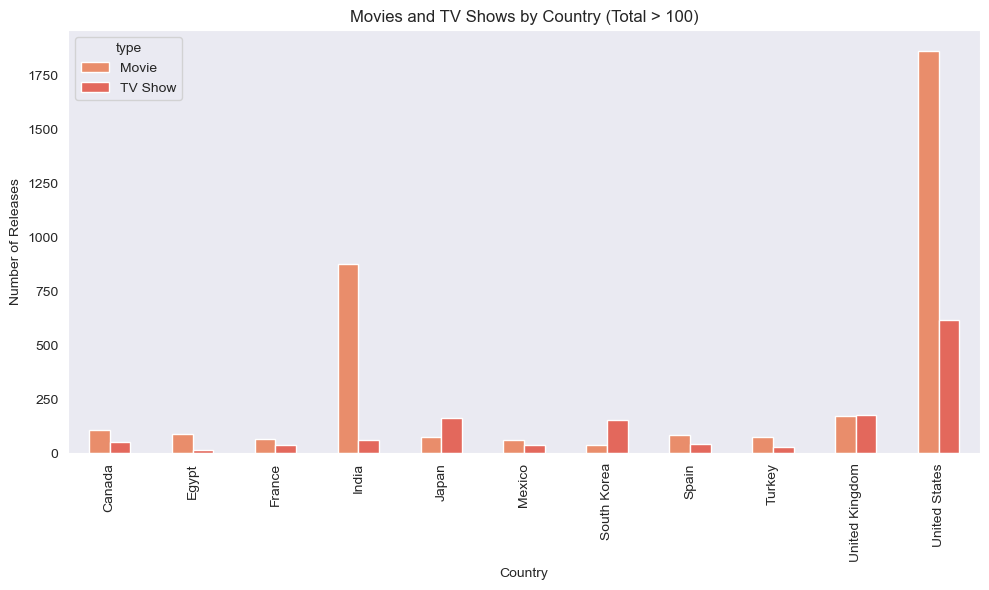

Max Number of Movies (per country):  1864.0
Min Number of Movies (per country):  40.0
Max Number of TV Shows (per country):  618.0
Min Number of TV Shows (per country):  14.0
Average Number of Movies (per country): 320.18
Average Number of TV Shows (per country):  126.55


In [226]:
df_netflix_country = df_netflix.pivot_table(
    index='country',
    columns='type',
    values='show_id',
    aggfunc='count'
)

df_netflix_country_filtered = df_netflix_country[
    df_netflix_country.sum(axis=1) > 100
]


df_netflix_country_filtered.plot(
    kind='bar',
    figsize=(10, 6)
)

plt.xlabel('Country')
plt.ylabel('Number of Releases')
plt.title('Movies and TV Shows by Country (Total > 100)')
plt.tight_layout()
plt.show()
print("Max Number of Movies (per country): ", df_netflix_country_filtered['Movie'].max())
print("Min Number of Movies (per country): ", df_netflix_country_filtered['Movie'].min())
print("Max Number of TV Shows (per country): ", df_netflix_country_filtered['TV Show'].max())
print("Min Number of TV Shows (per country): ", df_netflix_country_filtered['TV Show'].min())
print("Average Number of Movies (per country):", round(df_netflix_country_filtered['Movie'].mean(), 2))
print("Average Number of TV Shows (per country): ", round(df_netflix_country_filtered['TV Show'].mean(), 2))

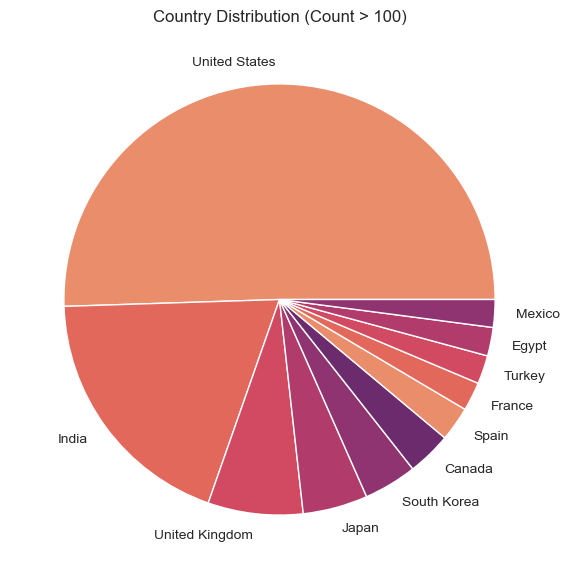

In [212]:
(df_netflix[
        df_netflix['country'].map(df_netflix['country'].value_counts()) > 100]['country'].value_counts().plot(
                kind='pie',
                figsize=(7, 7),
                title='Country Distribution (Count > 100)'))

plt.ylabel('')
plt.show()


### Country-wise Distribution of Movies and TV Shows

- The **United States** dominates the catalog with **1,864 movies** and **618 TV shows**, making it the largest contributor across both content types.
- **India** is the second-largest contributor, driven primarily by movies (**878 movies vs 62 TV shows**), indicating a strong movie-centric output.
- The **United Kingdom** shows a relatively balanced distribution with **173 movies** and **177 TV shows**, suggesting comparable production levels across both formats.
- **Japan** and **South Korea** stand out for their **TV show–heavy catalogs**, with Japan having **165 TV shows vs 74 movies** and South Korea **156 TV shows vs 40 movies**.
- **Canada, France, Spain, Mexico, Turkey, and Egypt** exhibit a higher number of movies than TV shows, reflecting a general preference toward movie releases in these regions.
- Overall, the data indicates **regional differences in content focus**, with some countries emphasizing movies, others TV shows, and a few maintaining a balanced mix.


rating
TV-MA       2660
TV-14       1755
R            779
TV-PG        653
PG-13        470
PG           275
TV-Y7        222
TV-Y         209
TV-G         158
NR            62
G             40
TV-Y7-FV       4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


<Axes: ylabel='count'>

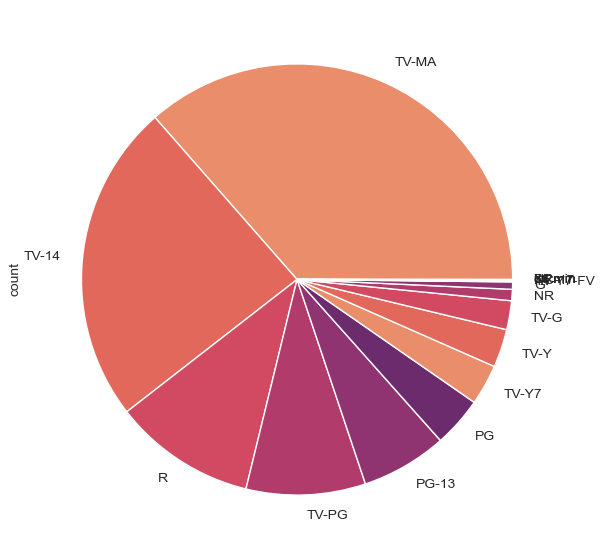

In [211]:
print(df_netflix['rating'].value_counts())
df_netflix['rating'].value_counts().plot(kind = 'pie',figsize=(7, 7))

Max Number of Movies (per rating):  1777.0
Min Number of Movies (per rating):  80.0
Max Number of TV Shows (per rating):  883.0
Min Number of TV Shows (per rating):  1.0
Average Number of Movies (per rating): 574.56
Average Number of TV Shows (per rating):  287.14


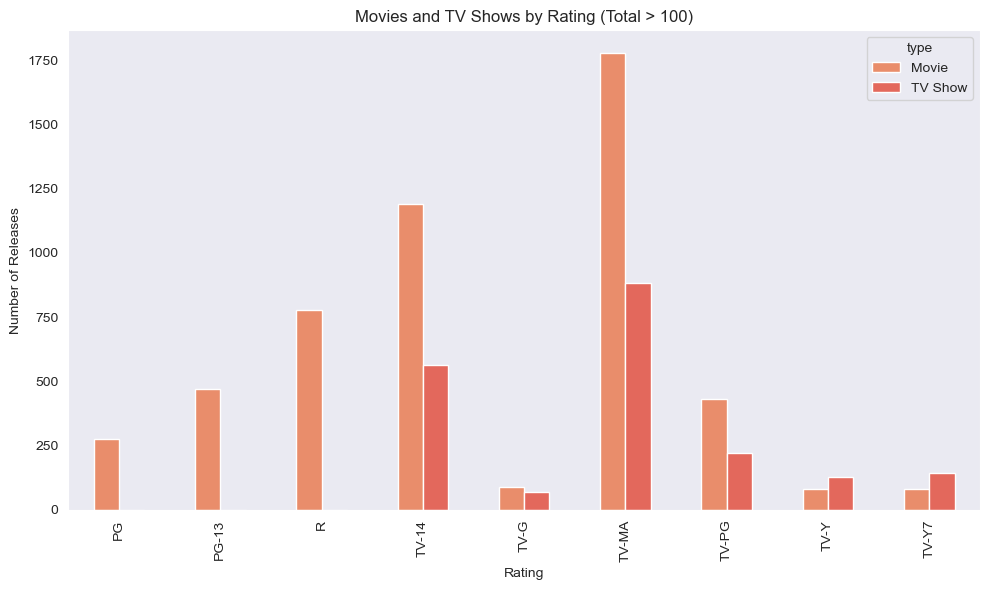

In [228]:
df_netflix_rating = df_netflix.pivot_table(
    index='rating',
    columns='type',
    values='show_id',
    aggfunc='count'
)
df_netflix_rating_filtered = df_netflix_rating[
    df_netflix_rating.sum(axis=1) > 100
]
df_netflix_rating_filtered.plot(
    kind='bar',
    figsize=(10, 6)
)

plt.xlabel('Rating')
plt.ylabel('Number of Releases')
plt.title('Movies and TV Shows by Rating (Total > 100)')
plt.tight_layout()
print("Max Number of Movies (per rating): ", df_netflix_rating_filtered['Movie'].max())
print("Min Number of Movies (per rating): ", df_netflix_rating_filtered['Movie'].min())
print("Max Number of TV Shows (per rating): ", df_netflix_rating_filtered['TV Show'].max())
print("Min Number of TV Shows (per rating): ", df_netflix_rating_filtered['TV Show'].min())
print("Average Number of Movies (per rating):", round(df_netflix_rating_filtered['Movie'].mean(), 2))
print("Average Number of TV Shows (per rating): ", round(df_netflix_rating_filtered['TV Show'].mean(), 2))
plt.show()

### Rating-wise Distribution of Movies and TV Shows

- **TV-MA** is the most dominant rating category, with **1,777 movies** and **883 TV shows**, indicating a strong presence of mature content across both formats.
- **TV-14** follows closely, showing substantial volumes for both **movies (1,191)** and **TV shows (564)**, reflecting a focus on content suitable for teen and young adult audiences.
- Ratings such as **PG**, **PG-13**, and **R** are **almost exclusively associated with movies**, with negligible or no TV show representation, highlighting a clear separation between movie and TV rating standards.
- Family and children-oriented ratings (**TV-G, TV-Y, TV-Y7**) have **lower overall counts** compared to mature categories but show a **higher proportion of TV shows than movies**, especially in **TV-Y and TV-Y7**.
- **TV-PG** presents a balanced yet moderate distribution, with **430 movies** and **223 TV shows**, serving as a midpoint between family-friendly and mature content.
- Overall, the distribution reveals a **strong skew toward mature and teen-rated content**, particularly in TV formats, while movie ratings dominate traditional film classification categories.


# Data Cleaning & Transformation

In [133]:
# df_netflix.drop(columns= 'director',axis  = 1,inplace=True)
df_netflix.dropna(subset=['country','cast','date_added'],inplace=True)
rating_mode = df_netflix['rating'].mode().iloc[0]
df_netflix['rating'] = df_netflix['rating'].fillna(rating_mode)
df_netflix.isnull().sum().sort_values(ascending=False)

duration        3
show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
listed_in       0
description     0
dtype: int64

# Movies

In [139]:
df_netflix_movies = df_netflix[df_netflix['type'] == 'Movie']
df_netflix_movies.head(5)
df_netflix_movies.isnull().sum().sort_values(ascending=False)

duration        3
show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
listed_in       0
description     0
dtype: int64

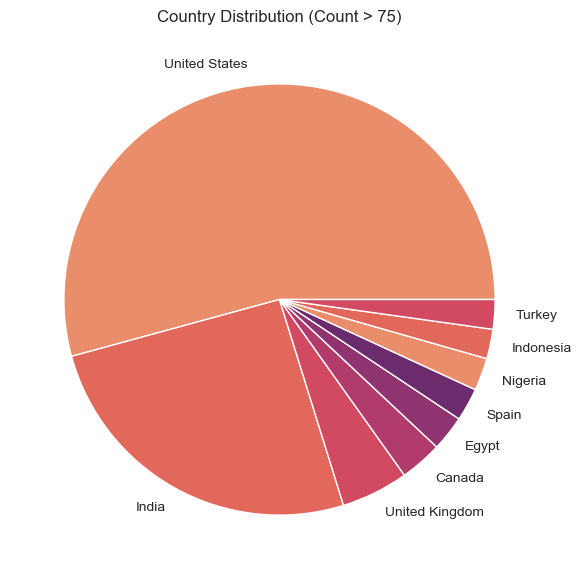

In [214]:

(df_netflix_movies[
        df_netflix_movies['country'].map(df_netflix_movies['country'].value_counts()) > 75]['country'].value_counts().plot(
                kind='pie',
                figsize=(7, 7),
                title='Country Distribution (Count > 75)'))

plt.ylabel('')
plt.show()


rating
TV-MA       1777
TV-14       1191
R            778
PG-13        470
TV-PG        430
PG           275
TV-G          90
TV-Y7         80
TV-Y          80
NR            58
G             40
NC-17          3
TV-Y7-FV       3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


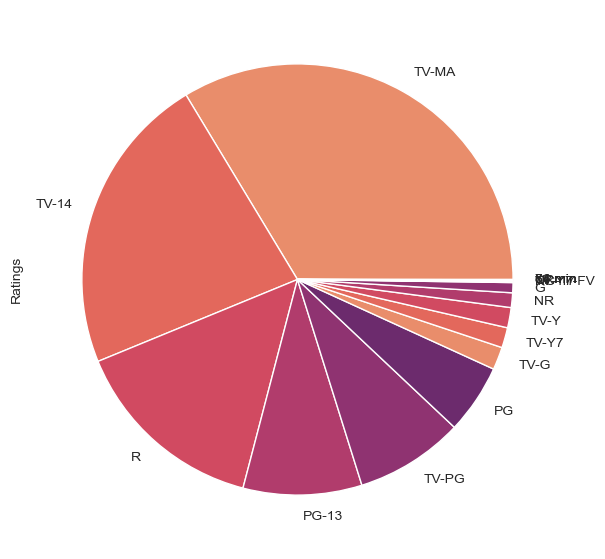

In [215]:
print(df_netflix_movies['rating'].value_counts())
df_netflix_movies['rating'].value_counts().plot(kind = 'pie',ylabel = 'Ratings',figsize = (7,7))
plt.show()

In [236]:
genre_counter = Counter()

for genres in df_netflix_movies['listed_in']:
    for genre in genres.split(','):
        genre_counter[genre.strip()] += 1

genre_dict = dict(genre_counter)
genre_dict

{'Dramas': 2310,
 'Independent Movies': 742,
 'International Movies': 2392,
 'Comedies': 1574,
 'Romantic Movies': 583,
 'Horror Movies': 338,
 'Sci-Fi & Fantasy': 239,
 'Thrillers': 549,
 'Action & Adventure': 811,
 'Classic Movies': 108,
 'Anime Features': 61,
 'Children & Family Movies': 521,
 'Documentaries': 410,
 'Music & Musicals': 299,
 'Cult Movies': 69,
 'Faith & Spirituality': 58,
 'LGBTQ Movies': 82,
 'Stand-Up Comedy': 310,
 'Movies': 33,
 'Sports Movies': 157}

# TV Shows

In [140]:
df_netflix_tvshows = df_netflix[df_netflix['type'] == 'TV Show']
df_netflix_tvshows.head(5)
df_netflix_tvshows.isnull().sum().sort_values(ascending=False)

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

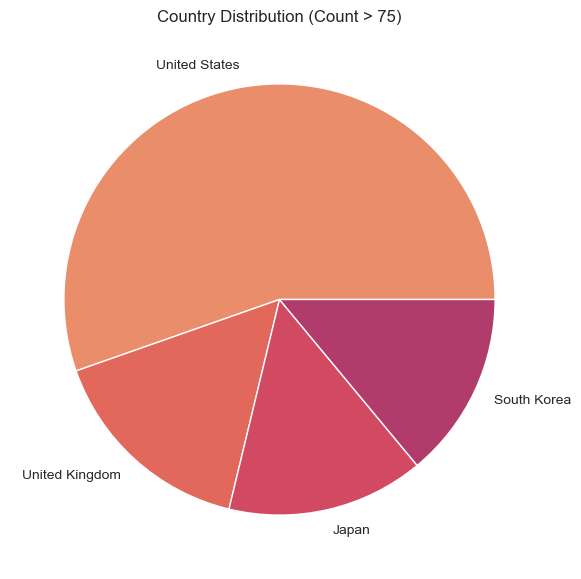

In [216]:

(df_netflix_tvshows[
        df_netflix_tvshows['country'].map(df_netflix_tvshows['country'].value_counts()) > 75]['country'].value_counts().plot(
                kind='pie',
                figsize=(7, 7),
                title='Country Distribution (Count > 75)'))

plt.ylabel('')
plt.show()


rating
TV-MA       883
TV-14       564
TV-PG       223
TV-Y7       142
TV-Y        129
TV-G         68
NR            4
R             1
TV-Y7-FV      1
Name: count, dtype: int64


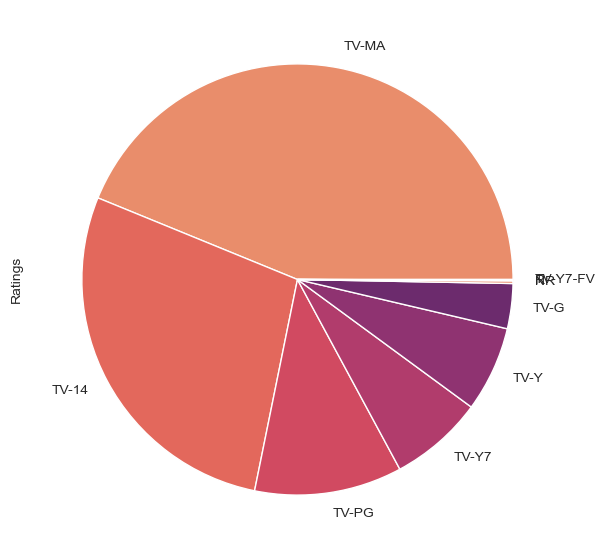

In [217]:
print(df_netflix_tvshows['rating'].value_counts())
df_netflix_tvshows['rating'].value_counts().plot(kind = 'pie',ylabel = 'Ratings',figsize = (7,7))
plt.show()

In [232]:
genre_counter = Counter()

for genres in df_netflix_tvshows['listed_in']:
    for genre in genres.split(','):
        genre_counter[genre.strip()] += 1

genre_dict = dict(genre_counter)
genre_dict

{'International TV Shows': 1048,
 'TV Dramas': 657,
 'TV Mysteries': 88,
 'Romantic TV Shows': 295,
 'TV Comedies': 481,
 'British TV Shows': 201,
 'Reality TV': 141,
 'Crime TV Shows': 358,
 'Spanish-Language TV Shows': 139,
 'TV Action & Adventure': 151,
 'Docuseries': 162,
 "Kids' TV": 343,
 'TV Sci-Fi & Fantasy': 76,
 'Anime Series': 151,
 'Korean TV Shows': 133,
 'Teen TV Shows': 64,
 'TV Horror': 69,
 'TV Shows': 5,
 'Classic & Cult TV': 25,
 'TV Thrillers': 50,
 'Science & Nature TV': 52,
 'Stand-Up Comedy & Talk Shows': 41}